In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
#read in all csv data files
fertility_df = pd.read_csv("Resources/Fertility.csv")
gdp_df = pd.read_csv("Resources/GDP per capita.csv")
life_expec_df = pd.read_csv("Resources/Life expectancy.csv")
happiness_df = pd.read_csv("Resources/Happiness.csv")
meat_df = pd.read_csv("Resources/Meat consumption.csv")
median_age_df = pd.read_csv("Resources/Median age.csv")
pop_growth_df = pd.read_csv("Resources/Population growth.csv")
sex_df = pd.read_csv("Resources/Sex-ratio.csv")
suicide_df = pd.read_csv("Resources/Suicide rate.csv")
urban_df = pd.read_csv("Resources/Urbanization rate.csv")

In [3]:
#merge data into one dataframe
fg_df = pd.merge(fertility_df,gdp_df, on='Country', how="outer")
fgl_df= pd.merge(fg_df, life_expec_df, on='Country', how="outer")
fglm_df = pd.merge(fgl_df, meat_df, on='Country', how="outer")
fglmm_df = pd.merge(fglm_df, median_age_df, on='Country', how="outer")
fglmmp_df = pd.merge(fglmm_df,pop_growth_df, on='Country', how="outer")
fglmmps_df = pd.merge(fglmmp_df,sex_df, on='Country', how="outer")
fglmmpss_df = pd.merge(fglmmps_df, suicide_df,on='Country', how="outer")
world_data = pd.merge(fglmmpss_df,urban_df,on='Country', how="outer")

In [4]:
#delete duplicate columns
del world_data ["ISO-code_x"]
del world_data ["ISO-code_y"]

In [5]:
world_data.head()

,Country,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,ISO-code
0,Afghanistan,4.5,2182.0,64.5,17.3,27.4,2.41,1.03,6.4,26.0,AFG
1,Albania,1.6,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,ALB
2,Algeria,3.0,16091.0,76.7,18.3,28.1,1.89,1.03,3.3,73.7,DZA
3,Andorra,1.3,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9,AND
4,Angola,5.5,6763.0,60.8,19.0,15.9,3.12,0.95,8.9,66.8,AGO


In [6]:
happiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [7]:
happiness1_df = happiness_df.rename(columns={"Country name":"Country",
                                             "Ladder score":"Happiness Score"})
new_df = happiness1_df[["Country","Regional indicator","Happiness Score"]]
world_data = pd.merge(world_data,new_df, on='Country', how="outer")
world_data.head()

,Country,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,ISO-code,Regional indicator,Happiness Score
0,Afghanistan,4.5,2182.0,64.5,17.3,27.4,2.41,1.03,6.4,26.0,AFG,South Asia,2.5669
1,Albania,1.6,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,ALB,Central and Eastern Europe,4.8827
2,Algeria,3.0,16091.0,76.7,18.3,28.1,1.89,1.03,3.3,73.7,DZA,Middle East and North Africa,5.0051
3,Andorra,1.3,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9,AND,NaN,NaN
4,Angola,5.5,6763.0,60.8,19.0,15.9,3.12,0.95,8.9,66.8,AGO,NaN,NaN


In [8]:
#Using isnull() to select all rows with NaN under an entire DataFrame:
world_data[world_data.isnull().any(axis=1)]

,Country,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,ISO-code,Regional indicator,Happiness Score
1,Albania,1.6,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,ALB,Central and Eastern Europe,4.8827
3,Andorra,1.3,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9,AND,NaN,NaN
4,Angola,5.5,6763.0,60.8,19.0,15.9,3.12,0.95,8.9,66.8,AGO,NaN,NaN
5,Antigua and Barbuda,2.0,30593.0,76.9,56.0,31.9,1.03,0.89,0.5,24.4,ATG,NaN,NaN
8,Aruba,1.9,NaN,NaN,NaN,39.3,0.44,0.90,NaN,43.7,ABW,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central and Eastern Europe,5.1598
750,Gambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,4.7506
751,Palestinian Territories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle East and North Africa,4.5528
752,Congo (Kinshasa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,4.3110


In [9]:
world_data.head(70)

,Country,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,ISO-code,Regional indicator,Happiness Score
0,Afghanistan,4.5,2182.0,64.50,17.3,27.4,2.41,1.03,6.4,26.0,AFG,South Asia,2.5669
1,Albania,1.6,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,ALB,Central and Eastern Europe,4.8827
2,Algeria,3.0,16091.0,76.70,18.3,28.1,1.89,1.03,3.3,73.7,DZA,Middle East and North Africa,5.0051
3,Andorra,1.3,NaN,81.80,NaN,44.3,0.63,1.06,NaN,87.9,AND,NaN,NaN
4,Angola,5.5,6763.0,60.80,19.0,15.9,3.12,0.95,8.9,66.8,AGO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Georgia,2.1,13200.0,73.60,26.0,38.1,0.63,0.92,6.7,59.5,GEO,Commonwealth of Independent States,4.6726
66,Germany,1.6,55306.0,81.20,82.1,47.1,0.11,0.96,9.1,77.5,DEU,Western Europe,7.0758
67,Ghana,3.9,7343.0,63.80,9.9,21.1,2.17,0.97,8.7,57.3,GHA,Sub-Saharan Africa,5.1480
68,Greece,1.4,31616.0,82.10,78.7,44.5,-0.18,0.95,3.8,79.7,GRC,Western Europe,5.5150


In [10]:
#Just to see the unique record count 
world_data["Country"].count()

754

In [11]:
#identify columns with missing data
print(world_data.isna().sum())

Country                0
Fertility             42
GDP per capita        52
Life expectancy       58
Meat consumption      55
Median age            19
Population growth     36
Sex-ratio             17
Suicide rate          61
Urbanization rate     25
ISO-code              25
Regional indicator    89
Happiness Score       89
dtype: int64


In [12]:
world_data.dropna(axis=0, how='any', inplace=True)

In [13]:
print(world_data.isna().sum())

Country               0
Fertility             0
GDP per capita        0
Life expectancy       0
Meat consumption      0
Median age            0
Population growth     0
Sex-ratio             0
Suicide rate          0
Urbanization rate     0
ISO-code              0
Regional indicator    0
Happiness Score       0
dtype: int64


In [14]:
world_data.dtypes

Country                object
Fertility             float64
GDP per capita        float64
Life expectancy       float64
Meat consumption      float64
Median age            float64
Population growth     float64
Sex-ratio             float64
Suicide rate          float64
Urbanization rate     float64
ISO-code               object
Regional indicator     object
Happiness Score       float64
dtype: object

In [15]:
world_data.describe()

,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness Score
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,4.191981,6611.704334,62.309598,17.145666,21.713313,2.244644,0.979133,9.205418,44.655263,5.059463
std,0.977358,13054.499377,6.534061,21.776132,5.988856,0.675905,0.073579,2.888725,13.608921,0.562847
min,1.100000,724.000000,52.800000,3.100000,15.400000,-1.600000,0.860000,2.000000,13.700000,2.566900
25%,4.500000,2113.000000,58.000000,6.500000,18.900000,2.390000,0.950000,7.400000,36.500000,4.949300
50%,4.500000,2574.000000,61.200000,13.000000,20.100000,2.390000,0.980000,9.450000,44.200000,4.949300
75%,4.700000,2574.000000,61.200000,13.000000,20.100000,2.560000,1.000000,10.500000,44.200000,4.949300
max,5.900000,112045.000000,84.500000,145.900000,47.300000,4.300000,2.560000,28.900000,100.000000,7.808700


In [16]:
world_data.corr()

,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness Score
Fertility,1.000000,-0.801351,-0.928797,-0.805337,-0.930296,0.883299,-0.109433,-0.084340,-0.773968,-0.667571
GDP per capita,-0.801351,1.000000,0.823358,0.867386,0.832114,-0.650818,0.225384,0.102677,0.777596,0.771061
Life expectancy,-0.928797,0.823358,1.000000,0.823379,0.892455,-0.796093,0.114276,0.007724,0.784391,0.697370
Meat consumption,-0.805337,0.867386,0.823379,1.000000,0.838589,-0.711913,0.116712,0.099648,0.790669,0.758547
Median age,-0.930296,0.832114,0.892455,0.838589,1.000000,-0.916091,0.020662,0.161118,0.755451,0.707219
Population growth,0.883299,-0.650818,-0.796093,-0.711913,-0.916091,1.000000,0.113507,-0.207344,-0.672858,-0.591497
Sex-ratio,-0.109433,0.225384,0.114276,0.116712,0.020662,0.113507,1.000000,-0.209017,0.161547,0.118294
Suicide rate,-0.084340,0.102677,0.007724,0.099648,0.161118,-0.207344,-0.209017,1.000000,0.038985,0.004744
Urbanization rate,-0.773968,0.777596,0.784391,0.790669,0.755451,-0.672858,0.161547,0.038985,1.000000,0.703193
Happiness Score,-0.667571,0.771061,0.697370,0.758547,0.707219,-0.591497,0.118294,0.004744,0.703193,1.000000


In [17]:
#1st relationship. Meat consumption vs Life Expectancy
#2st relationship. Meat consumption vs Urbanization Rate
#3rd relationship. Meat consumption vs Happiness Score
#4th relationship. Fertility vs Population growth
#5th relationship. Urbanization vs 


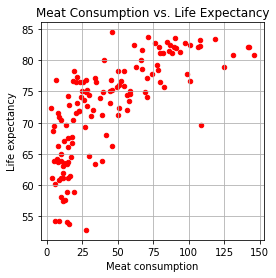

In [18]:
#1st relationship. Meat consumption vs Life Expectancy
lifeexpect_df = world_data.loc[:, ["Country", "Life expectancy", "Meat consumption"]]
lifeexpect_df.head()

avg_lifex =  pd.DataFrame(lifeexpect_df.groupby(["Country", "Life expectancy"])["Meat consumption"].mean()).reset_index()



avg_lifex.plot(kind="scatter", x="Meat consumption", y="Life expectancy", grid=True, color='red', figsize=(4,4),
              title="Meat Consumption vs. Life Expectancy")
plt.show()

In [19]:
import scipy.stats as st
correlation = st.pearsonr(avg_lifex['Meat consumption'],avg_lifex['Life expectancy'])
print(f"The correlation between meat consumption and life expectancy is {round(correlation[0],2)}")

The correlation between meat consumption and life expectancy is 0.72


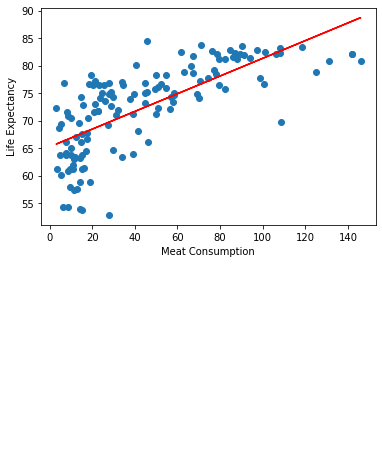

In [20]:
x_values = avg_lifex['Meat consumption']
y_values = avg_lifex['Life expectancy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")
plt.xlabel('Meat Consumption')
plt.ylabel('Life Expectancy')
plt.show()

In [30]:
region_lifeexpect_df = world_data.loc[:, ["Regional indicator", "Country", "Life expectancy", "Meat consumption"]]
region_lifeexpect_df.head()
reg_lifex_mean = region_lifeexpect_df.groupby('Regional indicator')['Life expectancy'].mean()
reg_lifex_mean
reg_mc_mean = region_lifeexpect_df.groupby('Regional indicator')['Meat consumption'].mean()
reg_mc_mean
lifex_mc_summary = pd.DataFrame({'Average Meat Consumption':reg_mc_mean,
                           'Average Life Expectancy':reg_lifex_mean})
lifex_mc_summary

,Average Meat Consumption,Average Life Expectancy
Regional indicator,,
Central and Eastern Europe,63.809091,77.409091
Commonwealth of Independent States,33.853846,72.276923
East Asia,69.033333,76.966667
Latin America and Caribbean,48.733333,74.914286
Middle East and North Africa,38.033333,75.446667
North America and ANZ,120.800000,81.650000
South Asia,9.083333,70.100000
Southeast Asia,30.850000,73.987500
Sub-Saharan Africa,10.138095,59.756593


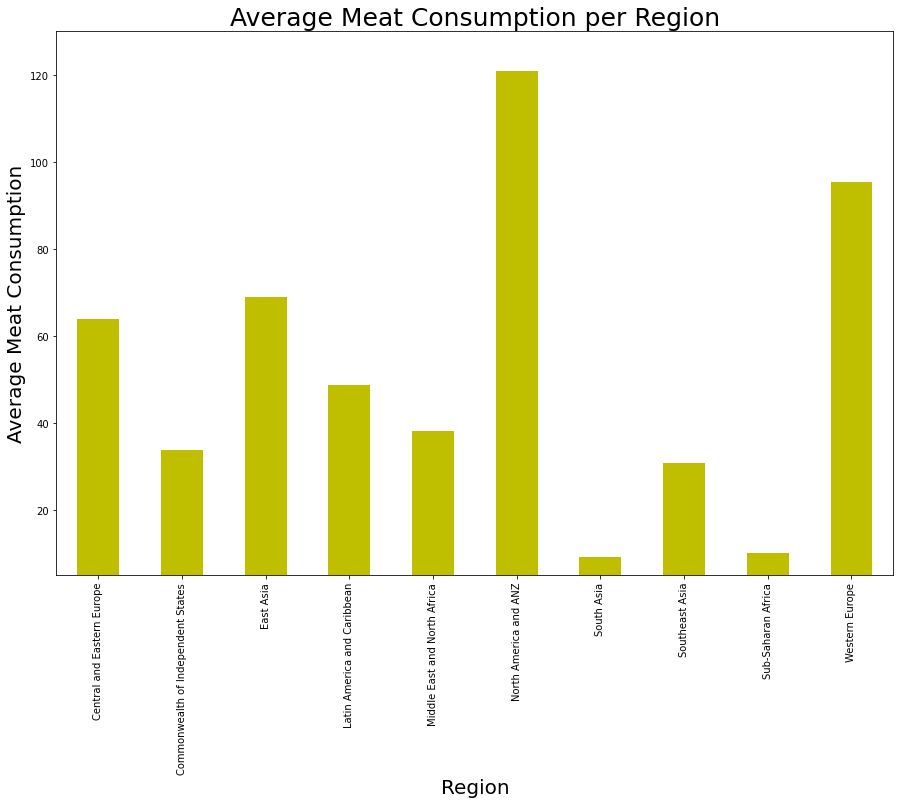

In [65]:
pd_plot = reg_mc_mean.plot.bar(figsize=(15,10),color = 'y')
plt.title("Average Meat Consumption per Region",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Average Meat Consumption",fontsize=20)
plt.ylim(5, 130)
plt.show()

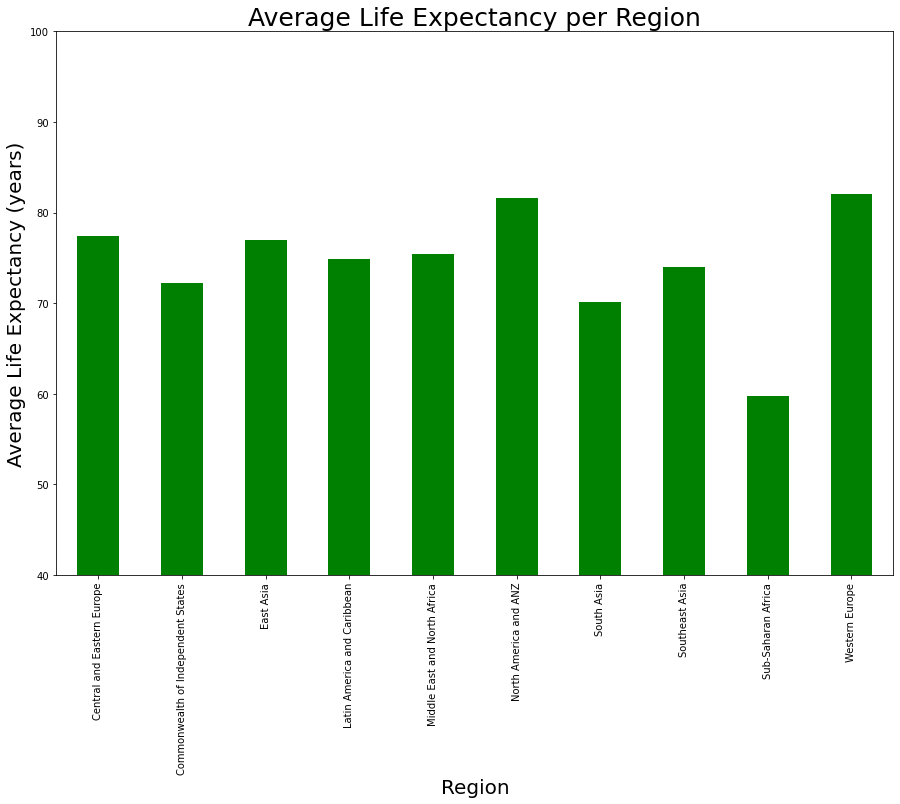

In [67]:
pd_plot = reg_lifex_mean.plot.bar(figsize=(15,10),color = 'g')
plt.title("Average Life Expectancy per Region",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Average Life Expectancy (years)",fontsize=20)
plt.ylim(40, 100)
plt.show()